In [1]:
#to use drive files
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [2]:
import os
import numpy as np
from PIL import Image

#path to the dataset
#each label is contained in a folder
data_directory = "/content/gdrive/MyDrive/cl"

#initialize lists for images and labels
images = []
labels = []

#for each class of the dataset
for class_name in os.listdir(data_directory):
    class_directory = os.path.join(data_directory, class_name)
    #for each image of the class
    for image_filename in os.listdir(class_directory):
        image_path = os.path.join(class_directory, image_filename)

        #read image + save dimensions
        image = Image.open(image_path)
        width, height = image.size
        #maximum dimension for the new image
        max_dimension = max(width, height)

        #new image (white square of maximum dimension)
        new_image = Image.new('RGB', (max_dimension, max_dimension), (255, 255, 255))  # (255, 255, 255) représente la couleur blanche
        #coordinates of the center of the new image
        x_center = (max_dimension - width) // 2
        y_center = (max_dimension - height) // 2

        #paste the original image in the center of the new image
        new_image.paste(image, (x_center, y_center))
        #image resizing so that all input images have the same dimensions
        resized_image = np.array(new_image.resize((100,100)))

        #maps each folder name to a numeric value
        label_to_id = {'ID7685': 0, 'ID7708': 1, 'ID7710': 2, 'ID7711': 3, 'ID7712': 4, 'ID7716': 5, 'ID7726': 6, 'ID7757': 7, 'ID7759': 8, 'ID7852': 9, 'ID7895': 10}
        #label_to_id = {'1': 0, '2': 1, '3': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '11': 8, '12': 9, '13': 10}
        #label_to_id = {'A1': 0, 'A2': 1, 'A4': 2, 'A5': 3, 'A6': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'C1': 8, 'C2': 9, 'D1': 10, 'D2': 11, 'D3': 12, 'D4': 13, 'E1': 14, 'E2': 15, 'F1': 16, 'F2': 17, 'G1': 18, 'H1': 19, 'H2': 20, 'H3': 21}
        #label_to_id = {'A1': 0, 'A2': 1, 'A3': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7, 'C3': 8, 'C4': 9, 'C5': 10, 'C6': 11, 'D1': 12, 'D2': 13}

        #add image and label to lists
        images.append(resized_image)
        labels.append(label_to_id[class_name])

#convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [3]:
import tensorflow as tf
from tensorflow import keras

#CNN model creation
model = keras.Sequential()

#convolution layer 1
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100, 100, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

#convolution layer 2
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

#convolution layer 3 (disable for shallower cnn)
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

#convolution layer 4
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

#data flattening for fully connected layers
model.add(keras.layers.Flatten())


#fully connected layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(11, activation='softmax'))  #set the number of classes

In [4]:
#model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#division of dataset into train and test set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2,stratify=labels) #stratify ensures that each class is represented fairly in both the training and testing sets

In [6]:
#training the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
19/19 [==============================] - 9s 37ms/step - loss: 8.3855 - accuracy: 0.3127
Epoch 2/20
19/19 [==============================] - 0s 12ms/step - loss: 0.7358 - accuracy: 0.7475
Epoch 3/20
19/19 [==============================] - 0s 11ms/step - loss: 0.3456 - accuracy: 0.8896
Epoch 4/20
19/19 [==============================] - 0s 11ms/step - loss: 0.1498 - accuracy: 0.9515
Epoch 5/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0483 - accuracy: 0.9883
Epoch 6/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0249 - accuracy: 0.9950
Epoch 7/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0123 - accuracy: 0.9983
Epoch 8/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 9/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/

In [7]:
#calculating model loss and accuracy with the test set
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)

#print precision
print("Test set accuracy : {:.2f}%".format(accuracy * 100))

5/5 [==============================] - 0s 7ms/step - loss: 0.2330 - accuracy: 0.9467
Test set accuracy : 94.67%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

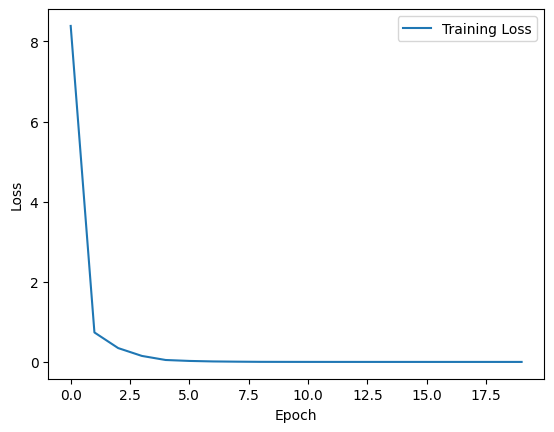

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

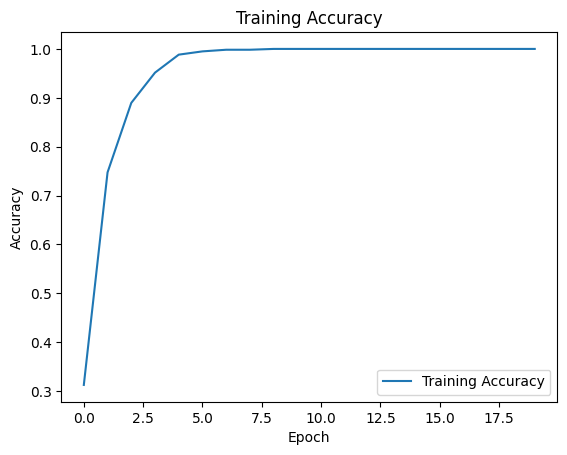

In [8]:
import matplotlib.pyplot as plt
from google.colab import files

#visualization of the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('loss.png')
files.download('loss.png')
plt.show()

#visualization of the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('acc.png')
files.download('acc.png')
plt.show()

In [9]:
#class predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

5/5 [==============================] - 0s 4ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

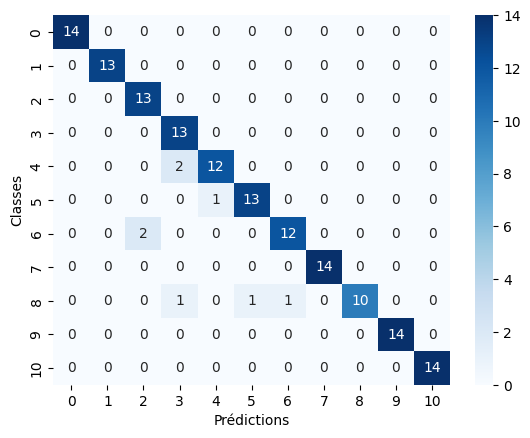

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Classes')
plt.savefig('heatmap.png')
files.download('heatmap.png')
plt.show()